In [1]:
## note after making changes,kernel must be restarted for changes to apply 

In [2]:
import FP_functions
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [3]:
## load in data 

data = pd.DataFrame(pd.read_csv("heart_2020_cleaned.csv"))
data


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
header = data.columns

In [5]:
## clean data

## heart disease 
npdata = data.to_numpy()
npdata[:,0] = (npdata[:,0]=="Yes").astype(int)## might be problematic if T/F isn't read as 1/0

##Smoking 
npdata[:,2] = (npdata[:,2]=="Yes").astype(int)

##AlcoholDrinking
npdata[:,3] = (npdata[:,3]=="Yes").astype(int)

##stroke 
npdata[:,4] = (npdata[:,4]=="Yes").astype(int)

##DiffWalking
npdata[:,7] = (npdata[:,7]=="Yes").astype(int)

##Sex : male = 1
npdata[:,8] = (npdata[:,8]=="Male").astype(int)

## annoying to clean rest of the data

npdata[:,0].sum()

27373

In [19]:
data = pd.DataFrame(npdata[:,:9], columns = header[:9], dtype = "float"  )
#data.dtypes

In [6]:
npdata[:,9]

array(['55-59', '80 or older', '65-69', ..., '45-49', '25-29',
       '80 or older'], dtype=object)

In [7]:
npdata[:,9]

array(['55-59', '80 or older', '65-69', ..., '45-49', '25-29',
       '80 or older'], dtype=object)

In [8]:
yesdata = npdata[npdata[:,0]==1,:]
nodata = npdata[npdata[:,0]==0,:]## all the data is here 

In [9]:
idx = np.random.randint(low = 0, high = len(yesdata), size=2500)
yesdata = yesdata[idx,:]

idx = np.random.randint(low = 0, high = len(nodata), size=2500)
nodata = nodata[idx,:]

In [10]:
evendata = np.append(nodata, yesdata, axis=0)

In [11]:
clean_data = pd.DataFrame(evendata[:,:9], columns = header[:9], dtype = "float"  )
#data.dtypes

In [12]:
clean_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex
0,0.0,22.31,0.0,0.0,0.0,5.0,10.0,0.0,0.0
1,0.0,27.69,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,26.73,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,30.18,1.0,0.0,0.0,30.0,0.0,1.0,0.0
4,0.0,23.91,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4995,1.0,29.99,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,1.0,26.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,1.0,19.05,0.0,0.0,0.0,30.0,0.0,0.0,0.0
4998,1.0,46.34,1.0,0.0,0.0,0.0,15.0,0.0,0.0


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    1.0
4996    1.0
4997    1.0
4998    1.0
4999    1.0
Name: HeartDisease, Length: 5000, dtype: float64         BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0     22.31      0.0              0.0     0.0             5.0          10.0   
1     27.69      1.0              0.0     0.0             0.0           0.0   
2     26.73      0.0              0.0     0.0             0.0           0.0   
3     30.18      1.0              0.0     0.0            30.0           0.0   
4     23.91      1.0              0.0     0.0             0.0           0.0   
...     ...      ...              ...     ...             ...           ...   
4995  29.99      0.0              0.0     0.0             0.0           0.0   
4996  26.63      1.0              0.0     0.0             0.0           0.0   
4997  19.05      0.0              0.0     0.0            30.0           0.0   
4998  46.34      1.0         

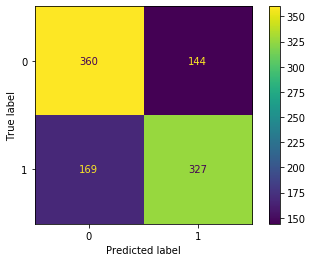

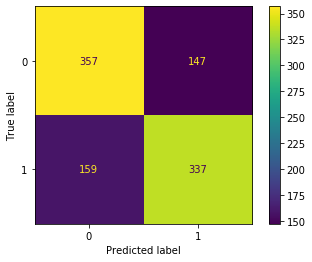

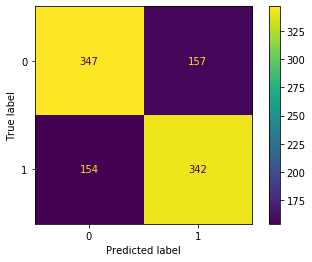

In [13]:

data_name = "Heart_Disease"

X = clean_data.loc[:,"BMI":"Sex",]## will need to be changed
#assert((X.dtypes =='float64').all())
Y = clean_data.loc[:,"HeartDisease"]
print(Y,X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2,shuffle=True)



SVM_LO_NN = ['SVM','logistic regression','neural net']#'lasso', ## this cannot be used because it cannon predict by classification
#"support vector machine" trained this model

for name in SVM_LO_NN :
    model, param_grid = FP_functions.choose_model(name)
    trained_model = FP_functions.model_training(model,X_train, Y_train, param_grid)
    filename = FP_functions.save_model(trained_model,name,data_name)
    loaded_model = FP_functions.scorer(filename, X_test, Y_test)
    print(name + ': Done!')

#functions.barchart(data, data_name)
#functions.boxplotting(data)

    
        
#twitter_loop()

In [22]:


Xtot = data.loc[:,"BMI":"Sex",]## will need to be changed
#assert((X.dtypes =='float64').all())
Ytot = data.loc[:,"HeartDisease"]
#print(Y,X)
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2,shuffle=True)


In [18]:
Xtot

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex


logistic regression_GS_Heart_Disease results on test data
accurarcy: 0.7168279679169468
neural net_GS_Heart_Disease results on test data
accurarcy: 0.7011397926796854
SVM_GS_Heart_Disease results on test data
accurarcy: 0.7074219421817102


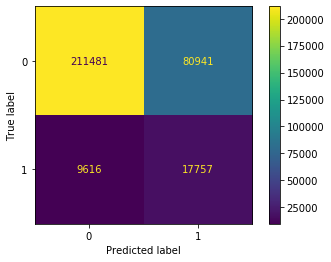

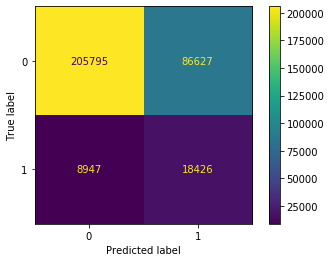

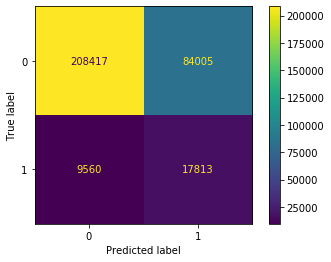

In [26]:
models = ["logistic regression_GS_Heart_Disease","neural net_GS_Heart_Disease",
         "SVM_GS_Heart_Disease"]
for mod in models:
    loaded_model = FP_functions.scorer(mod, Xtot, Ytot)

SVM_GS_Heart_Disease results on test data
accurarcy: 0.7074219421817102


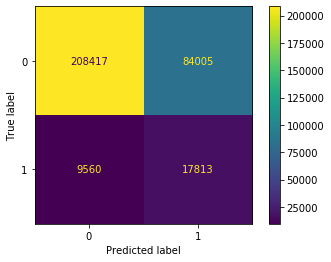

In [25]:
loaded_model = FP_functions.scorer("SVM_GS_Heart_Disease", Xtot, Ytot)

